In [228]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [229]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Importing the total season fantasy data for each position
totalRB = pd.read_csv("/content/drive/MyDrive/Fantasy Football Analysis 2023 Season/Total RB.T.csv")
totalRB = totalRB.drop(["ATT","Rank","YDS", "Y/A","LG","20+" ,"TD", "REC", "TGT", "YDS","YDS.1", "Y/R","TD.1","FL", "ROST"], axis=1)
totalRB['Position']='RB'
totalRB['Team'] = totalRB['Player'].str.split('(').str[1]
totalRB['Team']= totalRB['Team'].str.replace(")", "")
totalRB['Player'] = totalRB['Player'].str.split('(').str[0]
totalRB = totalRB.sort_values('Player')


totalQB = pd.read_csv("/content/drive/MyDrive/Fantasy Football Analysis 2023 Season/Total QB.csv")
totalQB=totalQB.reset_index()
totalQB = totalQB.drop(["CMP", "ATT", "PCT", "YDS", "Y/A", "TD", "INT", "SACKS", "ATT.1", "YDS.1", "TD.1", "FL", "ROST"], axis=1)
totalQB['Position']='QB'
totalQB['Team'] = totalQB['Player'].str.split('(').str[1]
totalQB['Team']= totalQB['Team'].str.replace(")", "")
totalQB['Player'] = totalQB['Player'].str.split('(').str[0]
totalQB = totalQB.sort_values('Player')
totalQB.rename(columns = {'index':'Rank'}, inplace = True)


totalWR = pd.read_csv("/content/drive/MyDrive/Fantasy Football Analysis 2023 Season/Total WR.T.csv")
totalWR = totalWR.drop(["REC","TGT","YDS", "Y/R","LG","20+" ,"TD", "ATT","YDS","YDS.1","TD.1","FL", "ROST"], axis=1)
totalWR['Position']='WR'
totalWR['Team'] = totalWR['Player'].str.split('(').str[1]
totalWR['Team']= totalWR['Team'].str.replace(")", "")
totalWR['Player'] = totalWR['Player'].str.split('(').str[0]
totalWR = totalWR.sort_values('Player')

totalTE = pd.read_csv("/content/drive/MyDrive/Fantasy Football Analysis 2023 Season/Total TE.T.csv")
totalTE = totalTE.drop(["REC","TGT","YDS", "Y/R","LG","20+" ,"TD", "ATT","YDS","YDS.1","TD.1","FL", "ROST"], axis=1)
totalTE['Position']='TE'
totalTE['Team'] = totalTE['Player'].str.split('(').str[1]
totalTE['Team']= totalWR['Team'].str.replace(")", "")
totalTE['Player'] = totalTE['Player'].str.split('(').str[0]
totalTE = totalTE.sort_values('Player')

totalswithgamesplayed=pd.concat([totalQB, totalRB, totalWR, totalTE], axis=0)
totalswithgamesplayed = totalswithgamesplayed.drop(columns=["FPTS", "Position", "Team"])


Schedule2023 = pd.read_csv("/content/drive/MyDrive/Fantasy Football Analysis 2023 Season/2023Schedules.csv")
Schedule2023= Schedule2023.drop(["W17", "W18"], axis = 1)

Defense = pd.read_csv("/content/drive/MyDrive/Fantasy Football Analysis 2023 Season/Defensive Rankings.csv")
twx = totalswithgamesplayed.pop('Rank')
totalswithgamesplayed.insert(3, 'Rank', twx+1)
print(totalswithgamesplayed.head(-5))


               Player     G  FPTS/G   Rank
73       AJ McCarron    2.0     0.4   74.0
82     Aaron Rodgers    1.0     0.0   83.0
114      Adam Froman    0.0     0.0  115.0
27   Aidan O'Connell   11.0    12.1   28.0
117     Alex McGough    0.0     0.0  118.0
..                ...   ...     ...    ...
59      Will Mallory   12.0     1.7   61.0
189    Zach Davidson    0.0     0.0  191.0
52         Zach Ertz    7.0     3.5   54.0
131      Zach Gentry    1.0     0.0  133.0
152       Zach Heins    0.0     0.0  154.0

[969 rows x 4 columns]


In [230]:
#establishing some data frames.  Some used and some not used.  Alot changed as we got deeper into the coding
qblist=list(totalQB['Player'])
completedataqb=pd.DataFrame()
weeklydata_QB=pd.DataFrame()
wdata=pd.DataFrame()
totalqbdata = pd.DataFrame()
tdata=pd.DataFrame()
completedatarb=pd.DataFrame()
weeklydata_RB=pd.DataFrame()
wdatar=pd.DataFrame()
print(qblist)
rblist=list(totalRB['Player'])
wdatawr=pd.DataFrame()

['AJ McCarron ', 'Aaron Rodgers ', 'Adam Froman ', "Aidan O'Connell ", 'Alex McGough ', 'Andy Dalton ', 'Anthony Brown Jr. ', 'Anthony Richardson ', 'Bailey Zappe ', 'Baker Mayfield ', 'Ben Chappell ', 'Ben DiNucci ', 'Blaine Gabbert ', 'Bo Nix ', 'Brandon Allen ', 'Brett Rypien ', 'Brett Smith ', 'Brian Hoyer ', 'Brock Purdy ', 'Bryce Young ', 'C.J. Beathard ', 'C.J. Stroud ', 'Caleb Williams ', 'Carson Wentz ', 'Carter Bradley ', 'Case Keenum ', 'Casey Bauman ', 'Cephus Johnson III ', 'Chris Oladokun ', 'Clayton Tune ', 'Cooper Rush ', 'Dak Prescott ', 'Daniel Jones ', 'Davis Mills ', 'Derek Carr ', 'Deshaun Watson ', 'Desmond Ridder ', 'Devin Leary ', 'Dorian Thompson-Robinson ', 'Drake Maye ', 'Dresser Winn ', 'Drew Lock ', 'Drew Plitt ', 'Easton Stick ', 'Erik Ainge ', 'Feleipe Franks ', 'Gardner Minshew II ', 'Geno Smith ', 'Hendon Hooker ', 'Hunter Cantwell ', 'Ian Book ', 'J.J. McCarthy ', 'Jacob Eason ', 'Jacoby Brissett ', 'Jake Browning ', 'Jake Fromm ', 'Jake Haener ', 'Jal

The following several coding frames are importing the week by week data for each player by position.  I couldn't find a file with every player week by week in 1 file, so I had to do it position by position and will merge it all together later on down the line

In [231]:
import pandas as pd

# Initialize an empty DataFrame for the total QB data
totalqbdata = pd.DataFrame()

# Iterate through each week (1 to 16)
for i in range(1, 17):
    # Read the weekly QB data
    weeklydata_QB = pd.read_csv(f"/content/drive/MyDrive/Fantasy Football Analysis 2023 Season/2023 QB Weekly/QB{i}.f.csv")

    # Drop the unnecessary columns
    columns_to_drop = ["Rank", "CMP", "ATT", "PCT", "YDS", "Y/A", "TD", "INT", "SACKS", "ATT.1", "YDS.1", "TD.1", "FL", "G", "FPTS/G", "ROST"]
    weeklydata_QB = weeklydata_QB.drop(columns=columns_to_drop)

    # Rename the FPTS column to indicate the week number
    weeklydata_QB = weeklydata_QB.rename(columns={"FPTS": f"FPTS_{i}"})

    # Extract the team name and clean the player names
    weeklydata_QB['Team'] = weeklydata_QB['Player'].str.split('(').str[1].str.replace(")", "")
    weeklydata_QB['Player'] = weeklydata_QB['Player'].str.split('(').str[0]

    # Sort the data by player name
    weeklydata_QB = weeklydata_QB.sort_values('Player')

    # If it's the first week, initialize the totalqbdata DataFrame
    if i == 1:
        totalqbdata = weeklydata_QB
    else:
        # For subsequent weeks, merge the new data with the totalqbdata DataFrame
        totalqbdata = pd.merge(totalqbdata, weeklydata_QB, on=['Player', 'Team'], how='outer')

# After processing all weeks, add the 'Pos' column
totalqbdata['Pos'] = 'QB'



print(totalqbdata[totalqbdata["Player"]== 'Tua Tagovailoa '])





                Player  FPTS_1 Team  FPTS_2  FPTS_3  FPTS_4  FPTS_5  FPTS_6  \
65654  Tua Tagovailoa     28.1  MIA    13.3    28.4    15.0    18.9    22.5   

       FPTS_7  FPTS_8  FPTS_9  FPTS_10  FPTS_11  FPTS_12  FPTS_13  FPTS_14  \
65654    11.3    22.8    12.4      0.0     18.6      9.8     19.2      9.1   

       FPTS_15  FPTS_16 Pos  
65654     13.0     15.5  QB  


In [232]:

totalqbdata['AvgFantasyPoints']=((totalqbdata['FPTS_1']+totalqbdata['FPTS_2']+totalqbdata['FPTS_3']+totalqbdata['FPTS_4']+totalqbdata['FPTS_5']+totalqbdata['FPTS_6']+totalqbdata['FPTS_7']+totalqbdata['FPTS_8']+totalqbdata['FPTS_9']+totalqbdata['FPTS_10']+totalqbdata['FPTS_11']+totalqbdata['FPTS_12']+totalqbdata['FPTS_13']+totalqbdata['FPTS_14']+totalqbdata['FPTS_15']+totalqbdata['FPTS_16'])/15)
print(totalqbdata[totalqbdata["Player"]== 'Tua Tagovailoa '])

                Player  FPTS_1 Team  FPTS_2  FPTS_3  FPTS_4  FPTS_5  FPTS_6  \
65654  Tua Tagovailoa     28.1  MIA    13.3    28.4    15.0    18.9    22.5   

       FPTS_7  FPTS_8  FPTS_9  FPTS_10  FPTS_11  FPTS_12  FPTS_13  FPTS_14  \
65654    11.3    22.8    12.4      0.0     18.6      9.8     19.2      9.1   

       FPTS_15  FPTS_16 Pos  AvgFantasyPoints  
65654     13.0     15.5  QB         17.193333  


In [233]:

# Initialize an empty DataFrame for the total RB data
totalrbdata = pd.DataFrame()

# Iterate through each week (1 to 17)
for i in range(1, 17):
    # Read the weekly RB data
    weeklydata_RB = pd.read_csv(f"/content/drive/MyDrive/Fantasy Football Analysis 2023 Season/2023 RB Weekly/RB{i}.f.csv")

    # Drop the unnecessary columns
    columns_to_drop = ["ATT", "Rank", "YDS", "Y/A", "LG", "20+", "TD", "REC", "TGT", "YDS.1", "Y/R", "TD.1", "FL", "G", "FPTS/G", "ROST"]
    weeklydata_RB = weeklydata_RB.drop(columns=columns_to_drop)

    # Rename the FPTS column to indicate the week number
    weeklydata_RB = weeklydata_RB.rename(columns={"FPTS": f"FPTS_{i}"})

    # Extract the team name and clean the player names
    weeklydata_RB['Team'] = weeklydata_RB['Player'].str.split('(').str[1].str.replace(")", "")
    weeklydata_RB['Player'] = weeklydata_RB['Player'].str.split('(').str[0]

    # Sort the data by player name
    weeklydata_RB = weeklydata_RB.sort_values('Player')

    # If it's the first week, initialize the totalrbdata DataFrame
    if i == 1:
        totalrbdata = weeklydata_RB
    else:
        # For subsequent weeks, merge the new data with the totalrbdata DataFrame
        totalrbdata = pd.merge(totalrbdata, weeklydata_RB, on=['Player', 'Team'], how='outer')




totalrbdata['AvgFantasyPoints']=((totalrbdata['FPTS_1']+totalrbdata['FPTS_2']+totalrbdata['FPTS_3']+totalrbdata['FPTS_4']+totalrbdata['FPTS_5']+totalrbdata['FPTS_6']+totalrbdata['FPTS_7']+totalrbdata['FPTS_8']+totalrbdata['FPTS_9']+totalrbdata['FPTS_10']+totalrbdata['FPTS_11']+totalrbdata['FPTS_12']+totalrbdata['FPTS_13']+totalrbdata['FPTS_14']+totalrbdata['FPTS_15']+totalrbdata['FPTS_16'])/15)


totalrbdata=totalrbdata.sort_values('AvgFantasyPoints', ascending=False)
totalrbdata=totalrbdata.reset_index()
totalrbdata.rename(columns = {'index':'Rank'}, inplace=True)
twr = totalrbdata.pop('Rank')
totalrbdata.insert(19, 'Rank', twr)
toralrbdata=totalrbdata.sort_values('Player', ascending=True)
totalrbdata['Pos']='RB'
print(totalrbdata[totalrbdata['Player']=='Aaron Jones '])
print(totalswithgamesplayed.head())



         Player  FPTS_1 Team  FPTS_2  FPTS_3  FPTS_4  FPTS_5  FPTS_6  FPTS_7  \
0  Aaron Jones     24.7  MIN    24.7    24.7    24.7    24.7    24.7    24.7   

   FPTS_8  ...  FPTS_10  FPTS_11  FPTS_12  FPTS_13  FPTS_14  FPTS_15  FPTS_16  \
0    24.7  ...     24.7     24.7     24.7     24.7     24.7     24.7     24.7   

   AvgFantasyPoints  Rank  Pos  
0         26.346667     1   RB  

[1 rows x 21 columns]
               Player     G  FPTS/G   Rank
73       AJ McCarron    2.0     0.4   74.0
82     Aaron Rodgers    1.0     0.0   83.0
114      Adam Froman    0.0     0.0  115.0
27   Aidan O'Connell   11.0    12.1   28.0
117     Alex McGough    0.0     0.0  118.0


In [234]:
# Initialize an empty DataFrame for the total WR data
totalwrdata = pd.DataFrame()

# Iterate through each week (1 to 17)
for i in range(1, 17):
    # Read the weekly WR data
    weeklydata_WR = pd.read_csv(f"/content/drive/MyDrive/Fantasy Football Analysis 2023 Season/2023 WR Weekly/WR{i}.f.csv")

    # Drop the unnecessary columns
    columns_to_drop = ["ATT", "Rank", "YDS", "Y/R", "LG", "20+", "TD", "REC", "TGT", "YDS.1", "Y/R", "TD.1", "FL", "G", "FPTS/G", "ROST"]
    weeklydata_WR = weeklydata_WR.drop(columns=columns_to_drop)

    # Rename the FPTS column to indicate the week number
    weeklydata_WR = weeklydata_WR.rename(columns={"FPTS": f"FPTS_{i}"})

    # Extract the team name and clean the player names
    weeklydata_WR['Team'] = weeklydata_WR['Player'].str.split('(').str[1].str.replace(")", "")
    weeklydata_WR['Player'] = weeklydata_WR['Player'].str.split('(').str[0]

    # Sort the data by player name
    weeklydata_WR = weeklydata_WR.sort_values('Player')

    # If it's the first week, initialize the totalwrdata DataFrame
    if i == 1:
        totalwrdata = weeklydata_WR
    else:
        # For subsequent weeks, merge the new data with the totalwrdata DataFrame
        totalwrdata = pd.merge(totalwrdata, weeklydata_WR, on=['Player', 'Team'], how='outer')




totalwrdata['AvgFantasyPoints']=((totalwrdata['FPTS_1']+totalwrdata['FPTS_2']+totalwrdata['FPTS_3']+totalwrdata['FPTS_4']+totalwrdata['FPTS_5']+totalwrdata['FPTS_6']+totalwrdata['FPTS_7']+totalwrdata['FPTS_8']+totalwrdata['FPTS_9']+totalwrdata['FPTS_10']+totalwrdata['FPTS_11']+totalwrdata['FPTS_12']+totalwrdata['FPTS_13']+totalwrdata['FPTS_14']+totalwrdata['FPTS_15']+totalwrdata['FPTS_16'])/15)
totalwrdata['Pos']='WR'
print(totalwrdata[totalwrdata['Player']== 'A.J. Brown '])


        Player  FPTS_1 Team  FPTS_2  FPTS_3  FPTS_4  FPTS_5  FPTS_6  FPTS_7  \
0  A.J. Brown     -1.1  PHI     5.3     8.0     5.6     7.4    11.4     9.7   

   FPTS_8  FPTS_9  FPTS_10  FPTS_11  FPTS_12  FPTS_13  FPTS_14  FPTS_15  \
0     0.8     0.0     12.6     25.0     19.7     13.1     12.7     29.5   

   FPTS_16  AvgFantasyPoints Pos  
0     13.1             11.52  WR  


In [235]:
totaltedata = pd.DataFrame()
# Iterate through each week (1 to 16)
for i in range(1, 17):
    # Read the weekly TE data
    weeklydata_TE = pd.read_csv(f"/content/drive/MyDrive/Fantasy Football Analysis 2023 Season/2023 TE Weekly/TE{i}.f.csv")

    # Drop the unnecessary columns
    columns_to_drop = ["ATT", "Rank", "YDS", "Y/R", "LG", "20+", "TD", "REC", "TGT", "YDS.1", "Y/R", "TD.1", "FL", "G", "FPTS/G", "ROST"]
    weeklydata_TE = weeklydata_TE.drop(columns=columns_to_drop)

    # Rename the FPTS column to indicate the week number
    weeklydata_TE = weeklydata_TE.rename(columns={"FPTS": f"FPTS_{i}"})

    # Extract the team name and clean the player names
    weeklydata_TE['Team'] = weeklydata_TE['Player'].str.split('(').str[1].str.replace(")", "")
    weeklydata_TE['Player'] = weeklydata_TE['Player'].str.split('(').str[0]

    # Sort the data by player name
    weeklydata_TE = weeklydata_TE.sort_values('Player')

    # If it's the first week, initialize the totaltedata DataFrame
    if i == 1:
        totaltedata = weeklydata_TE
    else:
        # For subsequent weeks, merge the new data with the totaltedata DataFrame
        totaltedata = pd.merge(totaltedata, weeklydata_TE, on=['Player', 'Team'], how='outer')



totaltedata['AvgFantasyPoints']=((totaltedata['FPTS_1']+totaltedata['FPTS_2']+totaltedata['FPTS_3']+totaltedata['FPTS_4']+totaltedata['FPTS_5']+totaltedata['FPTS_6']+totaltedata['FPTS_7']+totaltedata['FPTS_8']+totaltedata['FPTS_9']+totaltedata['FPTS_10']+totaltedata['FPTS_11']+totaltedata['FPTS_12']+totaltedata['FPTS_13']+totaltedata['FPTS_14']+totaltedata['FPTS_15']+totaltedata['FPTS_16'])/15)
totaltedata['Pos']='TE'
print(totaltedata.head())

                    Player  FPTS_1 Team  FPTS_2  FPTS_3  FPTS_4  FPTS_5  \
0               AJ Barner      0.0  SEA     0.0     0.0     0.0     0.0   
1           Adam Trautman      3.4  DEN     0.0     0.0     0.0     8.6   
2  Albert Okwuegbunam Jr.      0.0  PHI     0.0     0.0     0.0     0.0   
3             Andrew Beck      0.0  HOU     0.2     6.0     0.0     0.0   
4          Andrew DePaola      0.0  MIN     0.0     0.0     0.0     0.0   

   FPTS_6  FPTS_7  FPTS_8  FPTS_9  FPTS_10  FPTS_11  FPTS_12  FPTS_13  \
0     0.0     0.0     0.0     0.0      0.0      0.0      0.0      0.0   
1     0.4     0.5     0.0     0.0      1.5      3.3      6.8      0.6   
2     0.0     0.0     0.0     0.0      0.0      0.0      0.0      0.0   
3     0.0     0.0     4.9     0.5      0.0      0.0      0.1      0.5   
4     0.0     0.0     0.0     0.0      0.0      0.0      0.0      0.0   

   FPTS_14  FPTS_15  FPTS_16  AvgFantasyPoints Pos  
0      0.0      0.0      0.0          0.000000  TE  
1   

The next coding string takes a while so be patient

In [236]:
statmashup = pd.concat([totalqbdata, totalrbdata, totalwrdata, totaltedata], axis=0, sort=False)
#removeAway goes through the team names in the Schedule and the Defense data frames and makes sure that the team names mach those in statmashup
def removeAway(x):
    x = x.replace("@", "")
    x = x.replace("JAX", "JAC")
    x = x.replace("SFO", "SF")
    x = x.replace("GNB", "GB")
    x = x.replace("OAK", "LV")
    x = x.replace("NEW", "NE")
    x = x.replace("NOR", "NO")
    x = x.replace("TAM", "TB")
    x = x.replace("KAN", "KC")
    return x

Schedule2023["Team"] = Schedule2023["Team"].apply(removeAway)
Defense["Team"] = Defense["Team"].apply(removeAway)


for i in range(1, 17):
    Schedule2023["W" + str(i)] = Schedule2023["W" + str(i)].apply(removeAway)




#Stars to merge some dataframes together on the Players names and eliminates the duplicate rank columns

statmashup = pd.merge(statmashup, totalswithgamesplayed, on='Player')
statmashup=statmashup.drop('Rank_x', axis=1)
statmashup.rename(columns={'Rank_y': 'Rank'}, inplace=True)


sorted_df = statmashup.sort_values(by='AvgFantasyPoints', ascending=False)
sorted_df = sorted_df.drop(columns=['FPTS/G'])

merged_df = pd.merge(sorted_df, Schedule2023, left_on='Team', right_on='Team', how='left')


#Attaches the ranks of the defenses played each week to the rows for each player
rank_lookup = {}
for _, row in Defense.iterrows():
    rank_lookup[row['Team']] = {
        'QB': row['QB Rank'],
        'RB': row['RB Rank'],
        'WR': row['WR Rank'],
        'TE': row['TE Rank']
}

for week in ['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16']:
    merged_df[f'{week}_Opponent_Rank'] = merged_df.apply(
        lambda row: rank_lookup[row[week]].get(row['Pos'], None) if row[week] in rank_lookup and row[
            week] != 'BYE' else None,
        axis=1
    )

statmashup2=merged_df

#Just a check to allow me to visually check the team names in the Schedule for correctness

print(Schedule2023)




   Team   W1   W2   W3   W4   W5   W6   W7   W8   W9  W10  W11  W12  W13  W14  \
0   ARI  WAS  NYG  DAL   SF  CIN  LAR  SEA  BAL  CLE  ATL  HOU  LAR  PIT  BYE   
1   ATL  CAR   GB  DET  JAC  HOU  WAS   TB  TEN  MIN  ARI  BYE   NO  NYJ   TB   
2   BAL  HOU  CIN  IND  CLE  PIT  TEN  DET  ARI  SEA  CLE  CIN  LAC  BYE  LAR   
3   BUF  NYJ   LV  WAS  MIA  JAC  NYG   NE   TB  CIN  DEN  NYJ  PHI  BYE   KC   
4   CAR  ATL   NO  SEA  MIN  DET  MIA  BYE  HOU  IND  CHI  DAL  TEN   TB   NO   
5   CHI   GB   TB   KC  DEN  WAS  MIN   LV  LAC   NO  CAR  DET  MIN  BYE  DET   
6   CIN  CLE  BAL  LAR  TEN  ARI  SEA  BYE   SF  BUF  HOU  BAL  PIT  JAC  IND   
7   CLE  CIN  PIT  TEN  BAL  BYE   SF  IND  SEA  ARI  BAL  PIT  DEN  LAR  JAC   
8   DAL  NYG  NYJ  ARI   NE   SF  LAC  BYE  LAR  PHI  NYG  CAR  WAS  SEA  PHI   
9   DEN   LV  WAS  MIA  CHI  NYJ   KC   GB   KC  BYE  BUF  MIN  CLE  HOU  LAC   
10  DET   KC  SEA  ATL   GB  CAR   TB  BAL   LV  BYE  LAC  CHI   GB   NO  CHI   
11   GB  CHI  ATL   NO  DET 

In [237]:
# Ensure all team columns are strings and strip whitespace
Schedule2023['Team'] = Schedule2023['Team'].astype(str).str.strip()
Defense['Team'] = Defense['Team'].astype(str).str.strip()
statmashup2['Team'] = statmashup2['Team'].astype(str).str.strip()
statmashup2['Pos'] = statmashup2['Pos'].astype(str).str.strip()
statmashup2['Player'] = statmashup2['Player'].astype(str).str.strip()
# Also ensure the index of Schedule2023 and Defense are strings and stripped
Schedule2023.index = Schedule2023.index.astype(str).str.strip()
Defense.index = Defense.index.astype(str).str.strip()

# Convert 'Team' columns to strings
Schedule2023['Team'] = Schedule2023['Team'].astype(str)
Defense['Team'] = Defense['Team'].astype(str)
statmashup2['Team'] = statmashup2['Team'].astype(str)

# Set 'Team' as the index for relevant DataFrames
Schedule2023.set_index('Team', inplace=True)
Defense.set_index('Team', inplace=True)
statmashup2.set_index('Player', inplace=True)






In [238]:
def combine_duplicates(df):
    # Assuming numerical columns should be summed and non-numerical columns should be the first non-null value
    return df.groupby(df.index).agg(lambda x: x.sum() if pd.api.types.is_numeric_dtype(x) else x.iloc[0])

# Combine duplicates in the statmashup2 DataFrame
statmashup2 = combine_duplicates(statmashup2)

Handling for duplicate data points.  Eliminates duplicate data within teh database to prevent duplication errors

In [239]:

def correlation(player):
    try:
        pointdiffs = []
        rankings = []

        # Check if player exists in the DataFrame index
        if player not in statmashup2.index:
            print(f"Player {player} not found in statmashup2")
            return 0

        # Fetch the team and position for the player
        player_data = statmashup2.loc[player]

        team = player_data.get("Team")
        pos = player_data.get("Pos")

        # Check if team exists in Schedule2023
        if team not in Schedule2023.index:
            print(f"Team {team} not found in Schedule2023")
            return 0

        for i in range(1, 16):
            week_key = "Week " + str(i)
            points = player_data.get(week_key)
            avg_fantasy_points = player_data.get("AvgFantasyPoints")



            opponent = Schedule2023.loc[team].get("W" + str(i))

            if opponent == "BYE" or pd.isna(opponent):
                print(f"Bye week or no opponent data for {player} in Week {i}")
                continue

            if opponent not in Defense.index:
                print(f"Opponent {opponent} not found in Defense")
                continue

            if points is None or avg_fantasy_points is None:
                print(f"Missing points or average fantasy points for {player} in {week_key}")
                continue

            pointdiff = points - avg_fantasy_points
            ranking = Defense.loc[opponent].get(pos + " Rank")

            if ranking is None:
                print(f"Missing defense ranking for opponent {opponent} in {week_key}")
                continue

            pointdiffs.append(round(pointdiff, 2))
            rankings.append(ranking)

        if not pointdiffs or not rankings:
            print(f"No valid data points for {player}")
            return 0

        x = pd.Series(rankings)
        y = pd.Series(pointdiffs)

        correlation_value = round(x.corr(y), 2)
        return correlation_value
    except Exception as e:
        print(f"Exception occurred for player {player}: {e}")
        return 0












Lots of check point prints built into here.  If this were ever released to the public.  I'd eliminate all of the print statements to check for potential errors.

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


def graph(player):
    pointdiffs = []
    rankings = []
    team_names = []

    if player not in statmashup2.index:
        print(f"Player {player} not found in statmashup2")
        return

    team = statmashup2.loc[player, 'Team']
    pos = statmashup2.loc[player, 'Pos']

    for i in range(1, 17):
        points = statmashup2.loc[player].get("FPTS_" + str(i))
        opponent = Schedule2023.loc[team].get("W" + str(i))

        if opponent == "BYE" or points is None:
            continue

        pointdiff = points - statmashup2.loc[player].get("AvgFantasyPoints")
        ranking = Defense.loc[opponent].get(pos + " Rank")

        if ranking is not None:
            pointdiffs.append(round(pointdiff, 2))
            rankings.append(ranking)
            team_names.append(f"{opponent} ({ranking})")



    x = pd.Series(rankings)
    y = pd.Series(pointdiffs)

    plt.figure(figsize=(16, 8))  # Increase figure size for better readability
    plt.scatter(x, y)

    # Set the x-ticks with team names and rankings
    unique_rankings = np.unique(rankings)
    plt.xticks(ticks=unique_rankings, labels=[team_names[rankings.index(r)] for r in unique_rankings], rotation=90)

    plt.title(f"Effect of Defense Strength on {player} in 2023")
    plt.xlabel("Defense Ranking (1-32) with Team")
    plt.ylabel("Fantasy Production Above/Below Yearly Mean")

    xdata = np.array(x)
    ydata = np.array(y)
    m, b = np.polyfit(xdata, ydata, 1)
    plt.plot(x, m * x + b, color='red')  # Add line of best fit in red
    plt.show()





In [246]:
def perform_clustering(player):
    if player not in statmashup2.index:
        print(f"Player {player} not found in the dataset.")
        return

    position = statmashup2.loc[player, 'Pos']

    # Filter dataset to include only players of the same position
    position_players = statmashup2[statmashup2['Pos'] == position]
    features = ['AvgFantasyPoints'] + [f'FPTS_{i}' for i in range(1, 17)]
    data_for_clustering = position_players[features].dropna()

    if data_for_clustering.empty:
        print(f"No data available for players of position {position}.")
        return

    # Standardize the data
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data_for_clustering)

    # Perform K-Means Clustering
    kmeans = KMeans(n_clusters=5, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)

    # Add cluster labels to the DataFrame
    position_players.loc[data_for_clustering.index, 'Cluster'] = clusters

    # Visualize Clusters
    plt.figure(figsize=(14, 8))
    for cluster in range(5):
        cluster_data = position_players[position_players['Cluster'] == cluster]
        plt.scatter(cluster_data['AvgFantasyPoints'], cluster_data['FPTS_1'], label=f'Cluster {cluster}')

    plt.scatter(statmashup2.loc[player, 'AvgFantasyPoints'], statmashup2.loc[player, 'FPTS_1'], color='black', edgecolors='w', s=200, label=player)

    plt.title('Player Clustering Based on Fantasy Points')
    plt.xlabel('Average Fantasy Points')
    plt.ylabel('Fantasy Points Week 1')
    plt.legend()
    plt.show()

    # Print similar players
    player_cluster = position_players.loc[player]['Cluster']
    similar_players = position_players[position_players['Cluster'] == player_cluster].index.tolist()
    similar_players.remove(player)  # Remove the player themselves
    print(f"Players similar to {player}: {', '.join(similar_players)}")







In [242]:

statmashup2 = statmashup2[statmashup2['Team'] != 'FA']

statmashup2.drop(index='nan', inplace=True)

<ipython-input-242-c19ab4c93594>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statmashup2.drop(index='nan', inplace=True)


In [243]:
statmashup2 = combine_duplicates(statmashup2)

In [244]:

statmashup2 = statmashup2.assign(Correlation=statmashup2.index.map(correlation))
statmashup2 = statmashup2.assign(AbsCorrelation=statmashup2.get("Correlation").apply(abs))
statmashup2['Correlation'] = statmashup2['Correlation'].astype(float)
statmashup2['AbsCorrelation'] = statmashup2['AbsCorrelation'].astype(float)
sigdata = statmashup2[statmashup2.get("AvgFantasyPoints") > 6].sort_values("AbsCorrelation", ascending=False)
sigdata = sigdata[sigdata.get("AbsCorrelation") >= 0]
sigdata = sigdata[sigdata.get("G") > 6]




Streaming output truncated to the last 5000 lines.
Missing points or average fantasy points for Marcus Mariota in Week 9
Missing points or average fantasy points for Marcus Mariota in Week 10
Missing points or average fantasy points for Marcus Mariota in Week 11
Missing points or average fantasy points for Marcus Mariota in Week 12
Missing points or average fantasy points for Marcus Mariota in Week 13
Bye week or no opponent data for Marcus Mariota in Week 14
Missing points or average fantasy points for Marcus Mariota in Week 15
No valid data points for Marcus Mariota
Missing points or average fantasy points for Mark Andrews in Week 1
Missing points or average fantasy points for Mark Andrews in Week 2
Missing points or average fantasy points for Mark Andrews in Week 3
Missing points or average fantasy points for Mark Andrews in Week 4
Missing points or average fantasy points for Mark Andrews in Week 5
Missing points or average fantasy points for Mark Andrews in Week 6
Missing points or

Enter the position you wish to analyze (e.g., QB, RB, WR, TE): QB

Top 60 players for position QB
                          AvgFantasyPoints
Player                                    
Josh Allen                       24.240000
Jalen Hurts                      23.340000
Dak Prescott                     20.300000
Lamar Jackson                    20.126667
Brock Purdy                      19.266667
Jordan Love                      18.880000
Patrick Mahomes II               18.806667
Jared Goff                       17.953333
Russell Wilson                   17.660000
Sam Howell                       17.366667
Baker Mayfield                   17.300000
Trevor Lawrence                  17.226667
Tua Tagovailoa                   17.193333
C.J. Stroud                      16.440000
Justin Herbert                   16.013333
Matthew Stafford                 15.980000
Joshua Dobbs                     14.033333
Derek Carr                       13.753333
Justin Fields                    13.686667

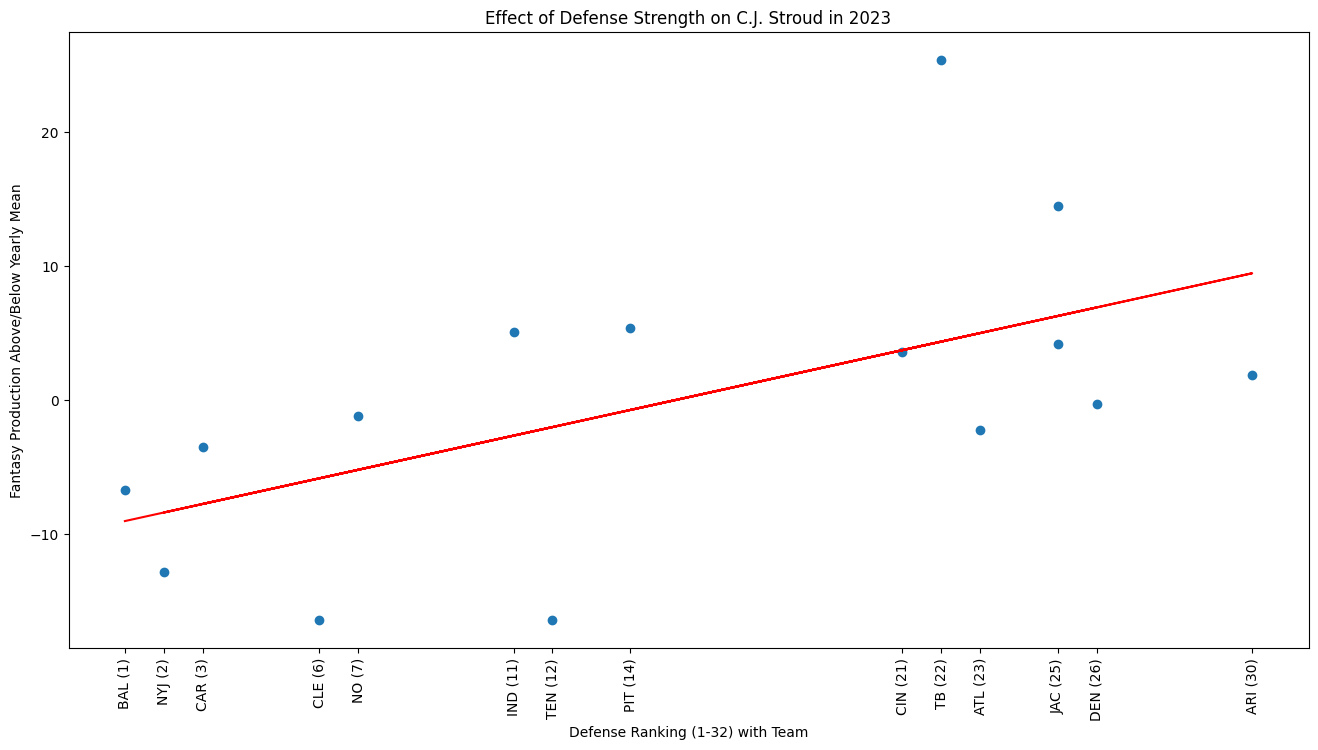

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-246-37e9c78fc2bb>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_players.loc[data_for_clustering.index, 'Cluster'] = clusters


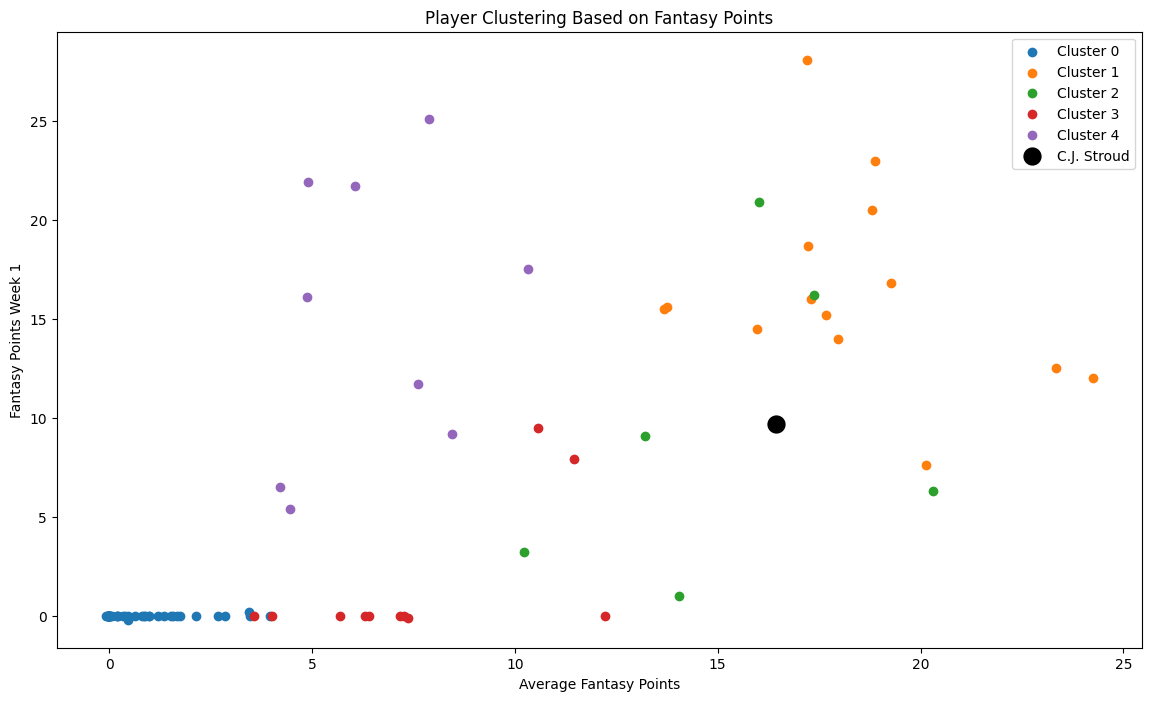

Players similar to C.J. Stroud: Dak Prescott, Geno Smith, Joe Burrow, Joshua Dobbs, Justin Herbert, Sam Howell


In [247]:
# Assuming statmashup2, Schedule2023, and Defense are already defined DataFrames
def get_top_players_by_position(position, top_n=60):
    filtered_df = statmashup2[statmashup2['Pos'] == position]
    sorted_df = filtered_df.sort_values(by='AvgFantasyPoints', ascending=False)
    return sorted_df.head(top_n)

def main():
    # Prompt user for a position
    position = input("Enter the position you wish to analyze (e.g., QB, RB, WR, TE): ").strip().upper()

    # Get top 60 players for the entered position
    top_players = get_top_players_by_position(position, 60)
    if top_players.empty:
        print(f"No players found for position {position}.")
        return

    # Display the top 60 players
    print("\nTop 60 players for position", position)
    print(top_players[['AvgFantasyPoints']])

    # Prompt user to select a player
    player = input("\nEnter the name of the player you wish to analyze (exactly as displayed or you can copy and paste): ").strip()

    if player not in top_players.index:
        print(f"Player {player} not found in the top 60 players for position {position}.")
        return

    # Execute the graph function on the selected player
    graph(player)
    perform_clustering(player)

if __name__ == "__main__":
    main()

you'll notice that some teams show two dots.  This reflects the fact that within the division, teams play each other twice, so they will have two points plotted per in team division.  If there are not plot points for a division game, it indicates that for whatever reason, the playe did not play, or they scored 0 points.  You may want to do further research on what happened during that week of play.  

Also, fantasy seasons are short compared to regular season, so we only looked at 16 weeks which in almost every instance included a bye week.  This should result in 15 data points per player and anything less than that indicates either injury, or did not play for whatever reason.  


Also observe in the graphs that the teams on the bottom go from best to worst defensive ranking vs to position.  If there is a positive slope in the mean of the graph, that means the player overall tends to perform better as the defensive ranking worsens, and the player performs worse as the defensive ranking improves.  This is the exact opposite if the slope of the mean line is negative.

https://github.com/anishkasam/fantasy-football/blob/master/2020.py

Got the initial idea for the build of this from this project.  Used some base coding build, but I wasn't able to find databases for the 2023 stats built the same as his.  This resulted in alot of data cleaning of the .cvs files I was able to find, and then merging the data together in a way that was consistent with what we wanted to analyze.

I added on some additional functionality to be able to specify in on individual players to analyze, and a cluster with a list of players of the same position who would perform similarly.

Definitely got some assistance from Chat GPT towards the end as I wanted to get the project finished.  

https://chatgpt.com/

Going into the 2024 season, as written, I'd say the best use of the code would be to determine how a player might perform against an upcoming team.  Some things to consider are: Did the defensive coordinator stay the same, were there major changes in defensive personnel between seasons, and was there a change in QB, head coach, or offensive coordinator.  These are all things to consider in making choices as well, that are not taken into account in the information provided because we are looking at historical data that only takes into acccount players and teams.  Coaches are not taken into account here.
